<a href="https://colab.research.google.com/github/eddorileo/saudeDigital/blob/main/src/notebook_noshow_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Criar uma pergunta (Objetivo)
2. Carregar os dados
3. Limpar os dados
  - Eliminar campos nulos e vazios
  - Eliminar inconsistências
5. Checar algumas estatísticas iniciais
6. Gerar um gráficos
7. Responder a pergunta (ou gerar novas perguntas)


**Pergunta:**

*   É possível predizer noshow?
*   Quais as causas?
*   Quais colunas (parâmetros) estão relacionados com o noshow?




In [5]:
#2. Carregando os dados

# Importando a biblioteca necessária
import pandas as pd
from google.colab import files

# Fazendo o upload do arquivo
uploaded = files.upload()

# Lendo o arquivo
for fn in uploaded.keys():
  print('-', fn)
  data = pd.read_csv(fn)

# Visualizando os primeiros registros
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# 3.1. Contando o número de valores nulos em cada coluna
nulos = data.isnull().sum()

# Visualizando o número de valores nulos
print(nulos)


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [8]:
#3.2. Consistência dos dados

# Supondo que 'df' é seu DataFrame e 'idade' é sua coluna de idade
idades = data['Age']

# Verificar idades negativas
negativas = idades[idades < 0]
print(f'Idades negativas: {negativas}')

# Verificar idades muito altas
altas = idades[idades > 150]
print(f'Idades muito altas: {altas}')

# Verificar idades não inteiras
nao_inteiras = idades[idades != idades.astype(int)]
print(f'Idades não inteiras: {nao_inteiras}')

# Verificar idades nulas ou ausentes
nulas = idades[idades.isnull()]
print(f'Idades nulas: {nulas}')


Idades negativas: 99832   -1
Name: Age, dtype: int64
Idades muito altas: Series([], Name: Age, dtype: int64)
Idades não inteiras: Series([], Name: Age, dtype: int64)
Idades nulas: Series([], Name: Age, dtype: int64)


In [9]:
idades[idades < 0]

99832   -1
Name: Age, dtype: int64

In [ ]:
# Supondo que 'data' é seu DataFrame
linha_324 = data.iloc[99832]

# Imprimindo a linha
print(linha_324)


PatientId            465943158731293.0
AppointmentID                  5775010
Gender                               F
ScheduledDay      2016-06-06T08:58:13Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                 -1
Neighbourhood                    ROMÃO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object


In [ ]:
data.drop(99832, inplace=True)

In [ ]:
data.iloc[99832]

In [ ]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

##Exemplo de Questão ao GPT:
Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object') com esse dataframe que graficos poderiam ser interessantes e fáceis de plotar, entender e fazer novas descobertas?


```
```

  

Histograma de Idades: Isso pode ajudar a entender a distribuição de idades dos pacientes.

In [ ]:
df = data.copy() #copia de segurança

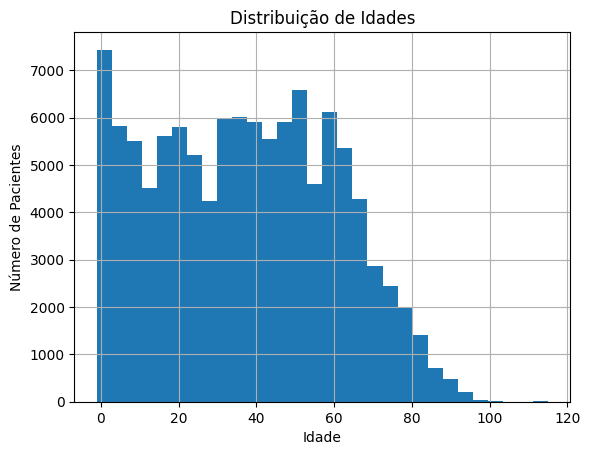

In [ ]:
import matplotlib.pyplot as plt
df['Age'].hist(bins=30)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.show()

Gráfico de Barras de Condições de Saúde: Você pode plotar a quantidade de pacientes com Hipertensão, Diabetes, Alcoolismo e Handcap.

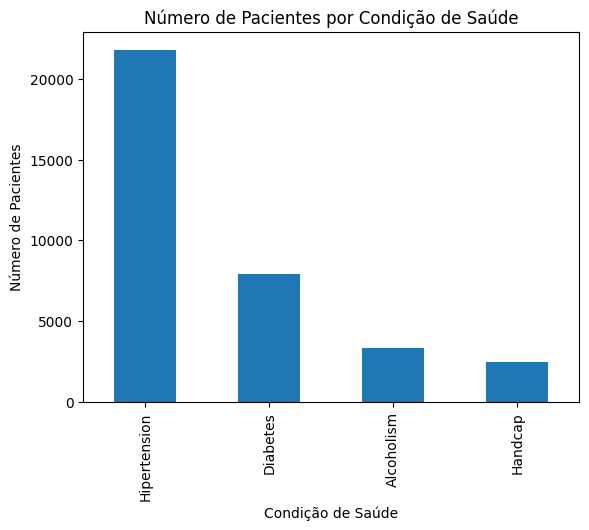

In [ ]:
conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
df[conditions].sum().plot(kind='bar')
plt.title('Número de Pacientes por Condição de Saúde')
plt.xlabel('Condição de Saúde')
plt.ylabel('Número de Pacientes')
plt.show()



Para criar um gráfico que mostre as condições de saúde por idade, você pode agrupar os dados por idade e calcular a média das condições de saúde. Aqui está um exemplo de como você pode fazer isso usando a biblioteca matplotlib para plotar os gráficos:

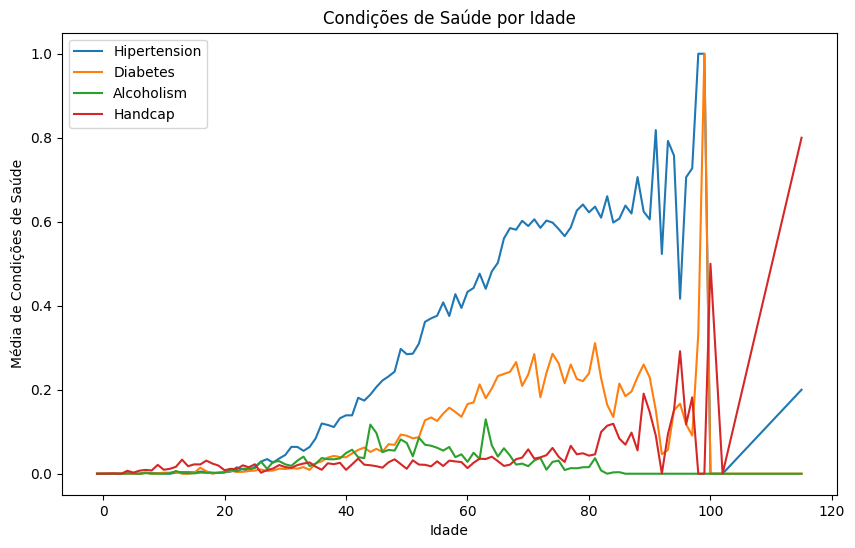

In [ ]:
# Convertendo a coluna 'Age' para numérica
#df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Agrupando os dados por idade e calculando a média das condições de saúde
health_conditions = df.groupby('Age')[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].mean()

# Plotando o gráfico
plt.figure(figsize=(10, 6))
for condition in ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']:
    plt.plot(health_conditions.index, health_conditions[condition], label=condition)

plt.xlabel('Idade')
plt.ylabel('Média de Condições de Saúde')
plt.title('Condições de Saúde por Idade')
plt.legend()
plt.show()


In [ ]:
#quem tem mais de 100 anos?
idades[idades>100]

58014    102
63912    115
63915    115
68127    115
76284    115
90372    102
97666    115
Name: Age, dtype: int64

Gráfico de Pizza de Gênero: Isso pode ajudar a entender a proporção de pacientes masculinos e femininos.

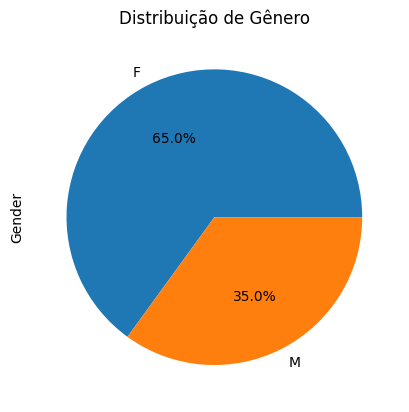

In [ ]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Gênero')
plt.show()

Gráfico de Barras de No-show: Você pode plotar a quantidade de pacientes que compareceram ou não à consulta.

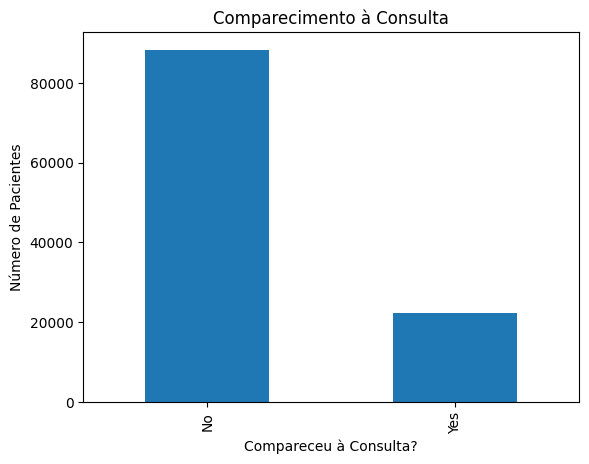

In [ ]:
df['No-show'].value_counts().plot(kind='bar')
plt.title('Comparecimento à Consulta')
plt.xlabel('Compareceu à Consulta?')
plt.ylabel('Número de Pacientes')
plt.show()

##GPT:
Como eu poderia identificar as principais variaveis relacionadas ao no_show positivo?

```
```
Para identificar as principais variáveis relacionadas ao No-show positivo, você pode usar técnicas de análise estatística e de aprendizado de máquina. Aqui estão algumas etapas que você pode seguir:

####**1) Análise Descritiva:**
Primeiro, você pode começar com uma análise descritiva para entender a distribuição de No-show em relação a outras variáveis. Por exemplo, você pode verificar a proporção de No-show para homens e mulheres, ou para diferentes faixas etárias.

####**2) Testes de Hipóteses:**
Você pode realizar testes de hipóteses para verificar se a diferença nas proporções de No-show para diferentes grupos é estatisticamente significativa. Por exemplo, você pode usar um teste de qui-quadrado para verificar se a proporção de No-show é significativamente diferente entre homens e mulheres.

####**3) Correlação:**
Você pode calcular a correlação entre No-show e outras variáveis numéricas. Isso pode ajudar a identificar quais variáveis têm uma forte relação linear com No-show.

####**4) Modelos de Aprendizado de Máquina:**
Finalmente, você pode usar modelos de aprendizado de máquina, como regressão logística ou árvores de decisão, para identificar as variáveis mais importantes. Esses modelos podem levar em conta interações complexas entre variáveis que podem ser difíceis de capturar com métodos estatísticos mais simples.


###Presença de valores categóricos

Se existe uma categoria ou um valor não numérico em uma das suas variáveis, você precisará tratar esses dados antes de poder usá-los em um modelo de aprendizado de máquina. Uma maneira comum de fazer isso é através do uso de codificação one-hot, que cria novas colunas para cada categoria única em uma variável.

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show'], dtype='object')

Este código irá imprimir uma lista de todas as colunas no DataFrame df que são provavelmente categóricas. Você pode ajustar o limite de 10 valores únicos para se adequar aos seus dados.

Depois de identificar as colunas categóricas, você pode passá-las para a função get_dummies:

In [ ]:
df2 = df.copy() #security copy

In [ ]:
# Convertendo as colunas 'ScheduledDay' e 'AppointmentDay' para datetime
df2['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df2['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Criando novas colunas para o dia da semana
df2['ScheduledDayOfWeek'] = df2['ScheduledDay'].dt.day_name()
df2['AppointmentDayOfWeek'] = df2['AppointmentDay'].dt.day_name()

# Em seguida, subtraia 'ScheduledDay' de 'AppointmentDay' para obter a diferença em dias
df2['DaysBetween'] = (df2['AppointmentDay'] - df2['ScheduledDay']).dt.days

Para identificar automaticamente as colunas que precisam ser passadas para a função get_dummies (metodo one-hot), você pode procurar por colunas no seu DataFrame que contêm dados categóricos. Uma maneira de fazer isso é selecionar colunas que têm o tipo de dados ‘object’, que é o tipo usado pelo pandas para representar dados textuais, que muitas vezes são categóricos.

No entanto, nem todas as colunas ‘object’ serão categóricas. Por exemplo, uma coluna de strings que representam texto livre provavelmente não seria uma boa candidata para a codificação one-hot. Portanto, você pode querer adicionar uma etapa adicional para verificar o número de valores únicos em cada coluna ‘object’. Se o número de valores únicos for relativamente pequeno, então é provável que a coluna seja categórica.

In [ ]:
# Selecionando as colunas do tipo 'object'
object_columns = df2.select_dtypes(include=['object']).columns

# Identificando as colunas categóricas
categorical_columns = [col for col in object_columns if df2[col].nunique() < 10]

print(categorical_columns)


['Gender', 'No-show', 'ScheduledDayOfWeek', 'AppointmentDayOfWeek']


Depois de identificar as colunas categóricas, você pode passá-las para a função get_dummies:

In [ ]:
df3 = pd.get_dummies(df2, columns=categorical_columns)
df3.columns

Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'DaysBetween', 'Gender_F',
       'Gender_M', 'No-show_No', 'No-show_Yes', 'ScheduledDayOfWeek_Friday',
       'ScheduledDayOfWeek_Monday', 'ScheduledDayOfWeek_Saturday',
       'ScheduledDayOfWeek_Thursday', 'ScheduledDayOfWeek_Tuesday',
       'ScheduledDayOfWeek_Wednesday', 'AppointmentDayOfWeek_Friday',
       'AppointmentDayOfWeek_Monday', 'AppointmentDayOfWeek_Saturday',
       'AppointmentDayOfWeek_Thursday', 'AppointmentDayOfWeek_Tuesday',
       'AppointmentDayOfWeek_Wednesday'],
      dtype='object')

In [ ]:
df4 = df3[['Age','Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'DaysBetween', 'Gender_F',
       'Gender_M',  'ScheduledDayOfWeek_Friday',
       'ScheduledDayOfWeek_Monday', 'ScheduledDayOfWeek_Saturday',
       'ScheduledDayOfWeek_Thursday', 'ScheduledDayOfWeek_Tuesday',
       'ScheduledDayOfWeek_Wednesday', 'AppointmentDayOfWeek_Friday',
       'AppointmentDayOfWeek_Monday', 'AppointmentDayOfWeek_Saturday',
       'AppointmentDayOfWeek_Thursday', 'AppointmentDayOfWeek_Tuesday',
       'AppointmentDayOfWeek_Wednesday', 'No-show_Yes',]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Selecionando as colunas que serão usadas como variáveis independentes
X = df4.drop(['No-show_Yes'], axis=1)

# 'No-show_Yes' é a nossa variável dependente
y = df4['No-show_Yes']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo
model = DecisionTreeClassifier()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy}')

# Exibindo a importância das variáveis
importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
importance = importance.sort_values('importance', ascending=False)
print(importance)


Acurácia do modelo: 0.7541843843300461
                           feature  importance
0                              Age    0.324639
7                      DaysBetween    0.287845
2                     Hipertension    0.034060
8                         Gender_F    0.029778
9                         Gender_M    0.027777
6                     SMS_received    0.027376
1                      Scholarship    0.026607
19   AppointmentDayOfWeek_Thursday    0.022320
21  AppointmentDayOfWeek_Wednesday    0.021921
20    AppointmentDayOfWeek_Tuesday    0.021602
14      ScheduledDayOfWeek_Tuesday    0.020669
17     AppointmentDayOfWeek_Monday    0.020381
15    ScheduledDayOfWeek_Wednesday    0.019912
11       ScheduledDayOfWeek_Monday    0.019729
10       ScheduledDayOfWeek_Friday    0.019166
16     AppointmentDayOfWeek_Friday    0.018328
13     ScheduledDayOfWeek_Thursday    0.018135
3                         Diabetes    0.016920
5                          Handcap    0.013399
4                    

Para determinar se a idade tem uma correlação positiva ou negativa com o No-show, você pode calcular a correlação entre essas duas variáveis. Em Python, você pode usar a função corr do pandas para isso.

In [ ]:
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)

x_sample = X_test.iloc[1].copy()
#x_sample.DaysBetween = 15
# x_sample.SMS_received = 0
# x_sample.Scholarship = 1
# x_sample.Gender_M = 1
# x_sample.Gender_F = 0
# x_sample.Age = 35
print(x_sample)
print("Este paciente vai faltar? -->  R:", model.predict([x_sample]))

Age                               37
Scholarship                        0
Hipertension                       0
Diabetes                           0
Alcoholism                         0
Handcap                            0
SMS_received                       1
DaysBetween                       34
Gender_F                           1
Gender_M                           0
ScheduledDayOfWeek_Friday          0
ScheduledDayOfWeek_Monday          0
ScheduledDayOfWeek_Saturday        0
ScheduledDayOfWeek_Thursday        0
ScheduledDayOfWeek_Tuesday         1
ScheduledDayOfWeek_Wednesday       0
AppointmentDayOfWeek_Friday        0
AppointmentDayOfWeek_Monday        0
AppointmentDayOfWeek_Saturday      0
AppointmentDayOfWeek_Thursday      0
AppointmentDayOfWeek_Tuesday       1
AppointmentDayOfWeek_Wednesday     0
Name: 3635, dtype: int64
Este paciente vai faltar? -->  R: [1]


In [ ]:
correlation = df4['Age'].corr(df4['No-show_Yes'])
print(correlation)


-0.06031851140917365


In [ ]:
import pandas as pd

# Construindo a tabela de contingência
contingency_table = pd.crosstab(df3['Scholarship'], df3['No-show_Yes'])

# Calculando as porcentagens
contingency_table = contingency_table.apply(lambda r: r/r.sum(), axis=1)

# Imprimindo a tabela de contingência com porcentagens
print(contingency_table)



No-show_Yes         0         1
Scholarship                    
0            0.801928  0.198072
1            0.762637  0.237363


Este código realiza um teste de qui-quadrado na tabela de contingência entre ‘Scholarship’ e ‘No-show_Yes’. O valor-p resultante indica a probabilidade de observar a distribuição atual de ‘No-show_Yes’ entre os grupos ‘Scholarship’ se a ‘Scholarship’ não tiver efeito sobre ‘No-show_Yes’. Um valor-p pequeno (geralmente menor que 0.05) rejeitaria a hipótese nula de que ‘Scholarship’ não tem efeito sobre ‘No-show_Yes’.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Construindo a tabela de contingência
contingency_table = pd.crosstab(df3['Scholarship'], df3['No-show_Yes'])

# Realizando o teste de qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimindo o valor-p
print(f"O valor-p do teste de qui-quadrado é {p}.")


O valor-p do teste de qui-quadrado é 3.906624913845394e-22.
